# Imports

In [45]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

# Data loading

In [46]:
adult_data = pd.read_csv("adult.data") 
adult_data.columns =["age","work_class","fnlwgt","education_level","education_num","marital_status","occupation","relationship","race","sex","capital_gain","capital_loss","hours_per_week","native_country","salary"]
#### Data Cleansing #####
def column_cleansing(var):
    return var.replace("?","None")
def column_int_cleansing(var1):
    if(var1=='?'):
        var1=0
    return var1    
adult_data['age'] = adult_data['age'].apply(column_int_cleansing)
adult_data['education_num'] = adult_data['education_num'].apply(column_int_cleansing)
adult_data['fnlwgt'] = adult_data['fnlwgt'].apply(column_int_cleansing)
adult_data['capital_gain'] = adult_data['capital_gain'].apply(column_int_cleansing)
adult_data['capital_loss'] = adult_data['capital_loss'].apply(column_int_cleansing)
adult_data['hours_per_week'] = adult_data['hours_per_week'].apply(column_int_cleansing)
adult_data['salary'] = adult_data['salary'].apply(column_int_cleansing)

adult_data['work_class'] = adult_data['work_class'].apply(column_cleansing)
adult_data['education_level'] = adult_data['education_level'].apply(column_cleansing)
adult_data['marital_status'] = adult_data['marital_status'].apply(column_cleansing)
adult_data['occupation'] = adult_data['occupation'].apply(column_cleansing)
adult_data['relationship'] = adult_data['occupation'].apply(column_cleansing)
adult_data['race'] = adult_data['race'].apply(column_cleansing)
adult_data['sex'] = adult_data['sex'].apply(column_cleansing)
adult_data['native_country'] = adult_data['native_country'].apply(column_cleansing)
#adult_data.to_csv("test1234",index=False)
#age(Taken)
#education_num(taken)
#hours_per_week(taken)
#sex
#work_class(taken)
#education_level
#maritial_status(multi taken)
#occupation(multi taken)
#relation_ship
#race(taken)
#native_country
#capital_gain(multi taken)
#capital_loss
#salary

In [47]:
salary_input = adult_data['salary']
salary_data = salary_input.map({' <=50K': 0, ' >50K': 1})
data=adult_data.drop("salary",axis=1)

In [48]:
def stats(data, salary_data, key,visualization_type,box_plot):
  filters = sorted(data[key].unique())

  all_data = pd.concat([data, salary_data.to_frame()], axis = 1)
  all_data = all_data[[key, 'salary']]

  if visualization_type=="bar":
      vals_lessthan_or_equal_50k = all_data[all_data["salary"] == 0][key]
      vals_greaterthan_50k = all_data[all_data["salary"] == 1][key]
      if box_plot:
          plt.boxplot(vals_lessthan_or_equal_50k)
          plt.ylabel(key.upper(),fontsize=15)
          plt.title("Boxplot of  %s Feature for <=50k"% (key.upper()))
          plt.show()
          plt.boxplot(vals_greaterthan_50k)
          plt.ylabel(key.upper(),fontsize=15)
          plt.title("Boxplot of  %s Feature for >50k" % (key.upper()))
          plt.show()

       # Numerical features
      numerical_features = ["age", "hours_per_week"]
      plt.figure(figsize=(20, 10))
      if(key in numerical_features):

        min_value = all_data[key].min()
        max_value = all_data[key].max()
        value_range = max_value - min_value

        bins = np.arange(0, all_data[key].max() + 10, 10)

        plt.hist(vals_lessthan_or_equal_50k, bins = bins, alpha = 0.6,color = 'red', label = '<=50k')
        plt.hist(vals_greaterthan_50k, bins = bins, alpha = 0.6,color = 'green', label = ">50k")
        plt.xlim(0, bins.max())
        plt.xlabel(key.upper(), fontsize=30)
        plt.ylabel('Number of People', fontsize=30)
        plt.legend(framealpha=0.8, fontsize=25)
        plt.title('Statistics of Customer Salary Range With %s Feature' % (key.upper()), fontsize=40)
        plt.show()

      # Categorical features
      else:

        frame = pd.DataFrame(index = np.arange(len(filters)), columns=(key,"salary","nsalary"))
        for i, value in enumerate(filters):
          frame.loc[i] = [value, \
                       len(all_data[(all_data["salary"] == 1) & (all_data[key] == value)]), \
                       len(all_data[(all_data["salary"] == 0) & (all_data[key] == value)])]

        bar_width = 0.4

        for i in np.arange(len(frame)):
            nonsurv_bar = plt.bar(i-bar_width, frame.loc[i]['nsalary'], width = bar_width, color = 'b')
            surv_bar = plt.bar(i, frame.loc[i]["salary"], width = bar_width, color = 'y')

            plt.xticks(np.arange(len(frame)), filters)
            plt.legend((nonsurv_bar[0], surv_bar[0]),('<=50k', ">50k"), framealpha = 0.8, fontsize=25)

        plt.xlabel(key.upper(), fontsize=30)
        plt.ylabel('Number of People', fontsize=30)
        plt.title('Statistics of Customer Salary Range With %s Feature' % (key.upper()), fontsize=40)
        plt.show()
  elif visualization_type == "pie":
      plt.figure(figsize=(35,20))
      frame = pd.DataFrame(index=np.arange(len(filters)), columns=(key, "salary", "nsalary"))
      for i, value in enumerate(filters):
          frame.loc[i] = [value, len(all_data[(all_data["salary"] == 1) & (all_data[key] == value)]),
                          len(all_data[(all_data["salary"] == 0) & (all_data[key] == value)])]
      plt.pie(frame["salary"], labels=frame[key], startangle=90,labeldistance=None)
      plt.legend(frame[key], loc="best")
      plt.title('Statistics of Customer Salary Range With %s Feature for above 50k' % (key.upper()), fontsize=40)
      plt.show()
      plt.figure(figsize=(35, 20))
      plt.pie(frame["nsalary"], labels=frame[key], startangle=90,labeldistance=None)
      plt.title("Salary <=50k pie chart for Native Country")
      plt.legend(frame[key], loc="best")
      plt.title('Statistics of Customer Salary Range With %s Feature for below 50k' % (key.upper()), fontsize=40)
      plt.show()


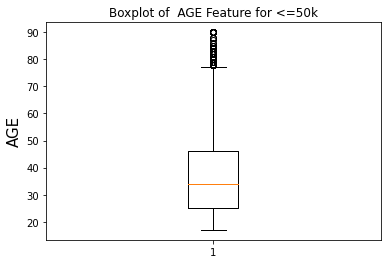

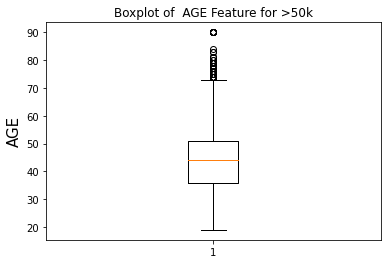

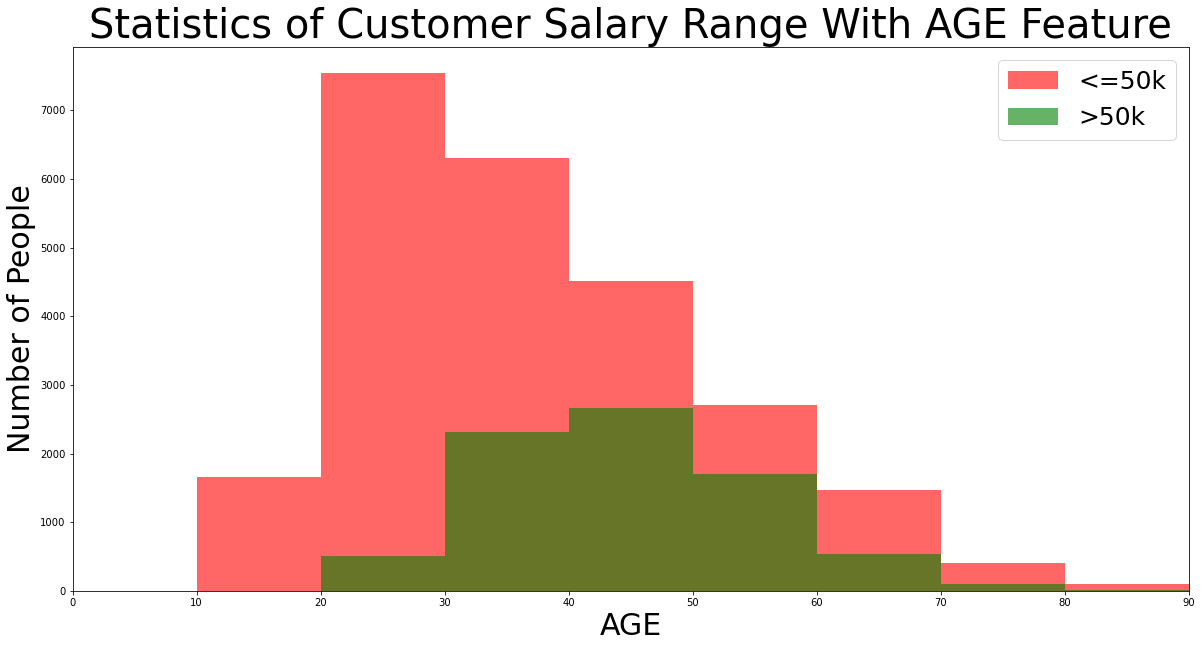

In [49]:
stats(data, salary_data, "age","bar",True)

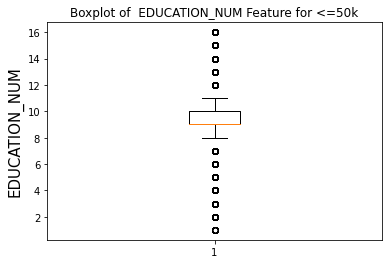

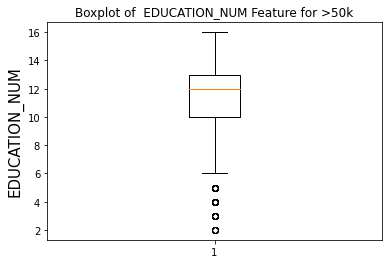

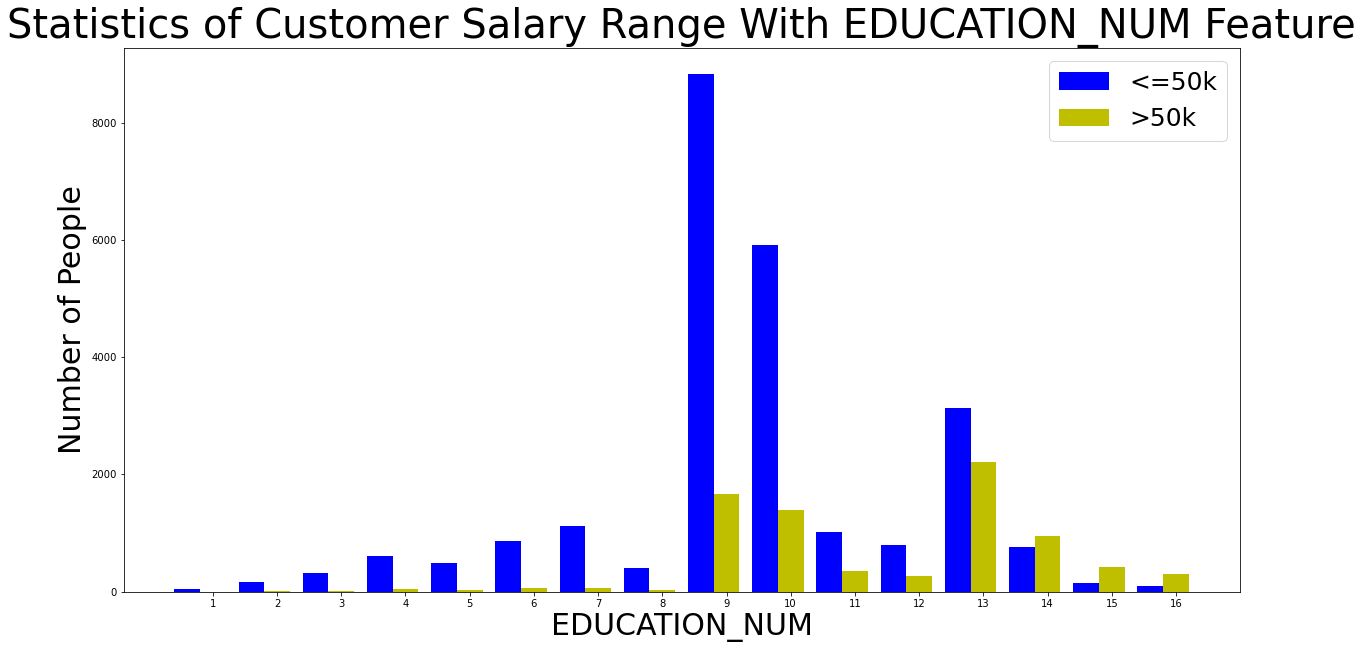

In [50]:
stats(data, salary_data, "education_num","bar",True)

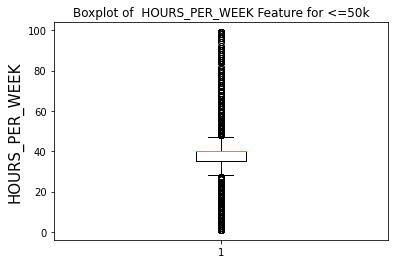

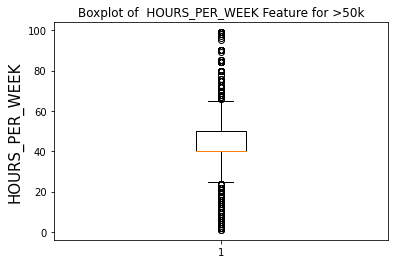

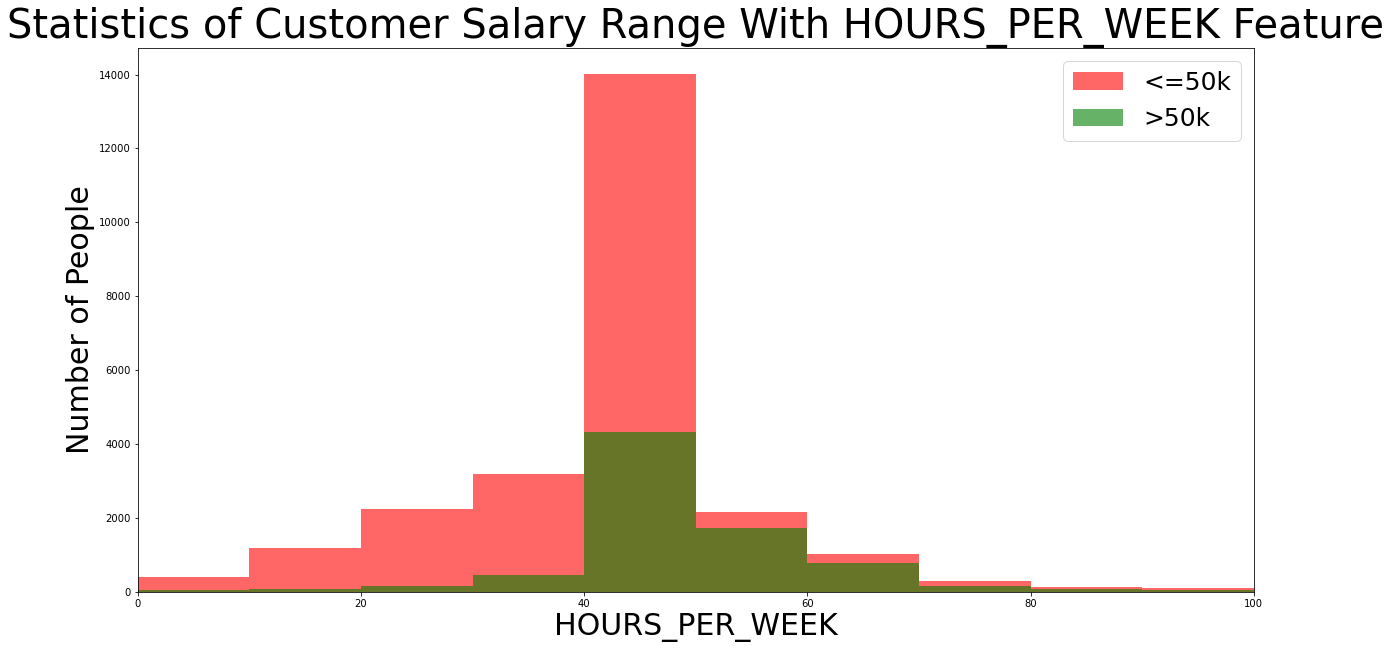

In [51]:
stats(data, salary_data, "hours_per_week","bar",True)

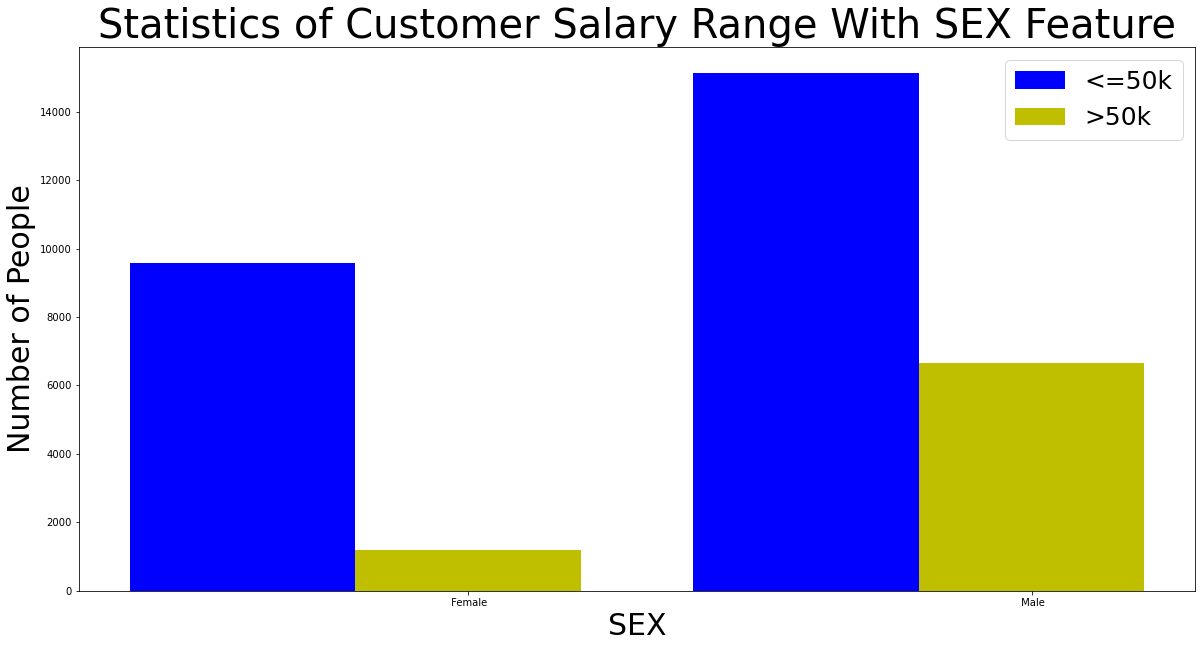

In [54]:
stats(data, salary_data, "sex","bar",False)

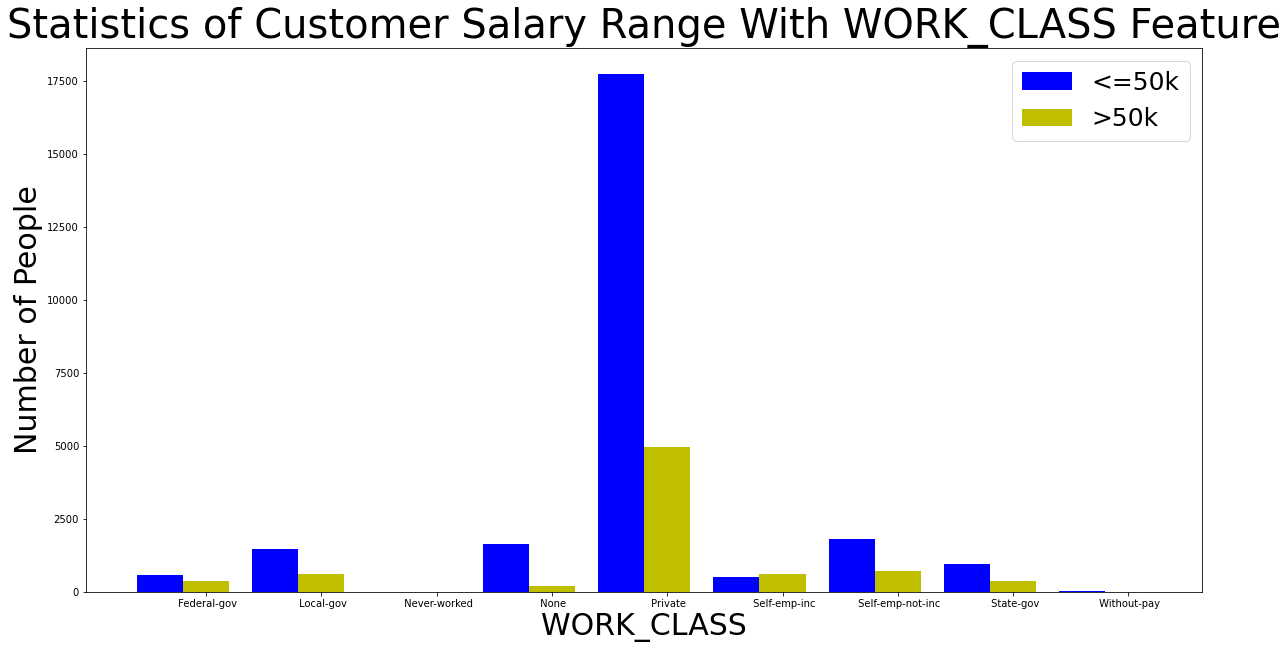

In [55]:
stats(data, salary_data, "work_class","bar",False)

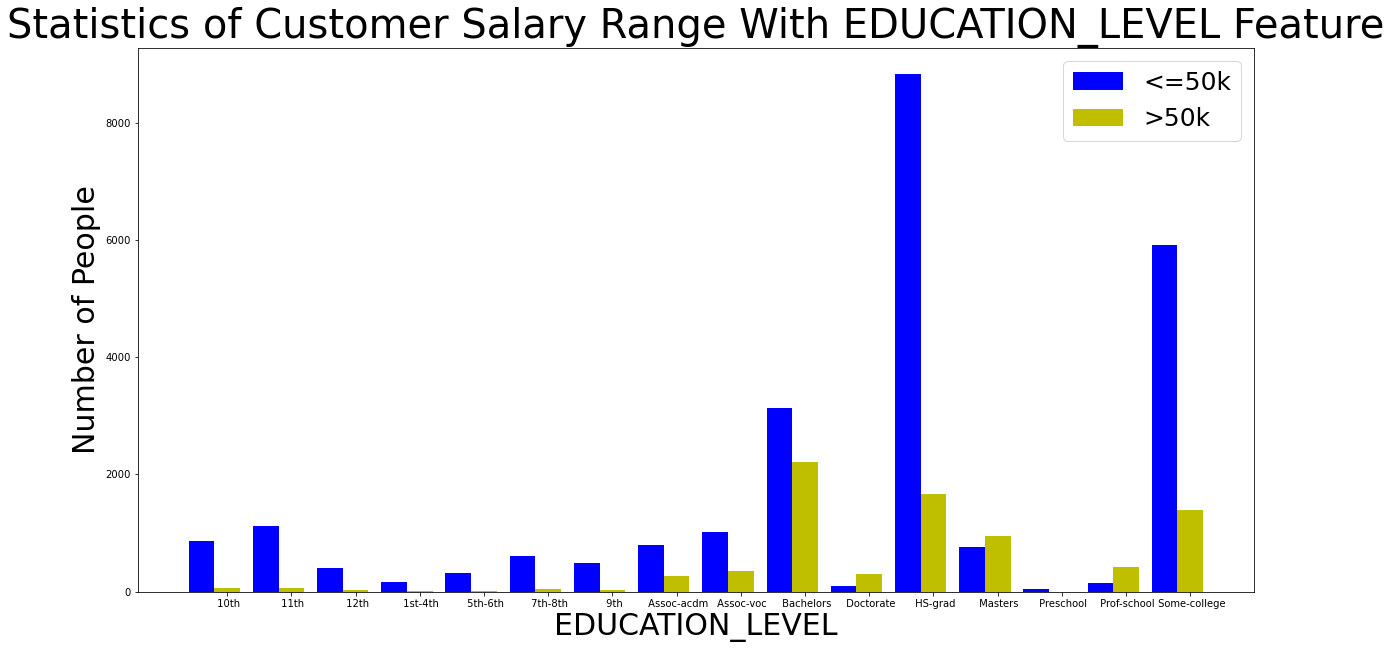

In [56]:
stats(data, salary_data, "education_level","bar",False)

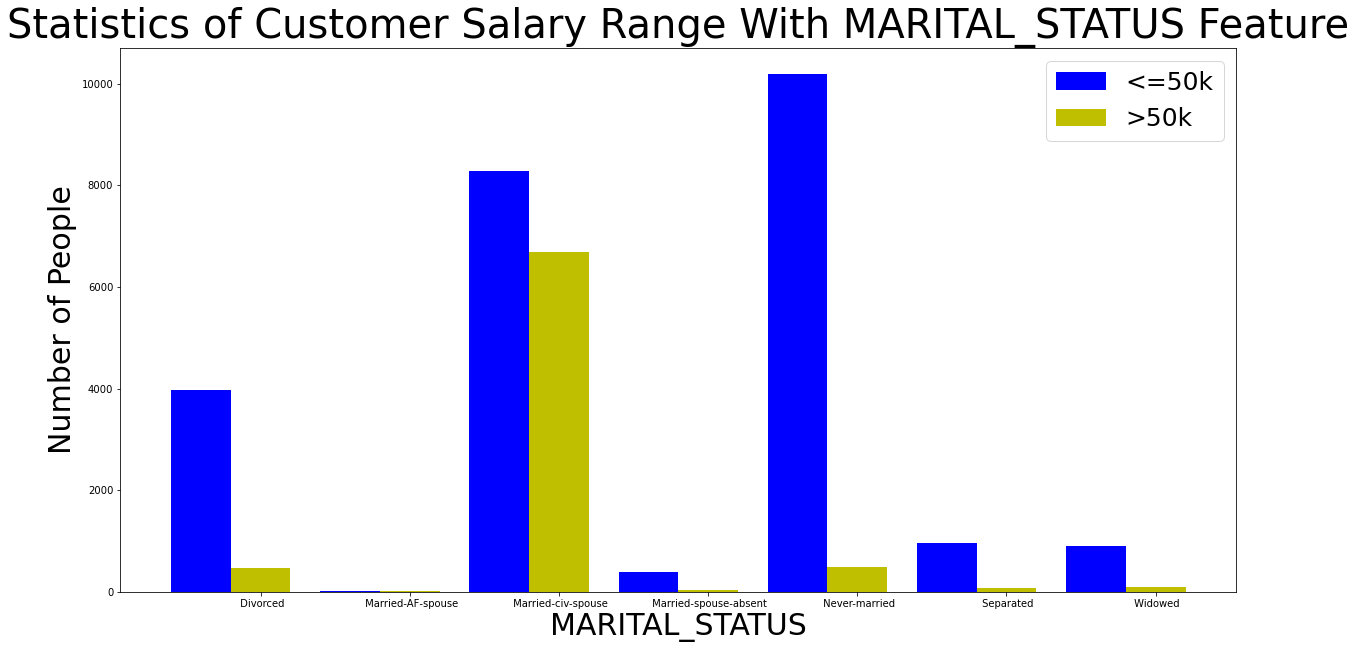

In [36]:
stats(data, salary_data, "marital_status","bar",False)

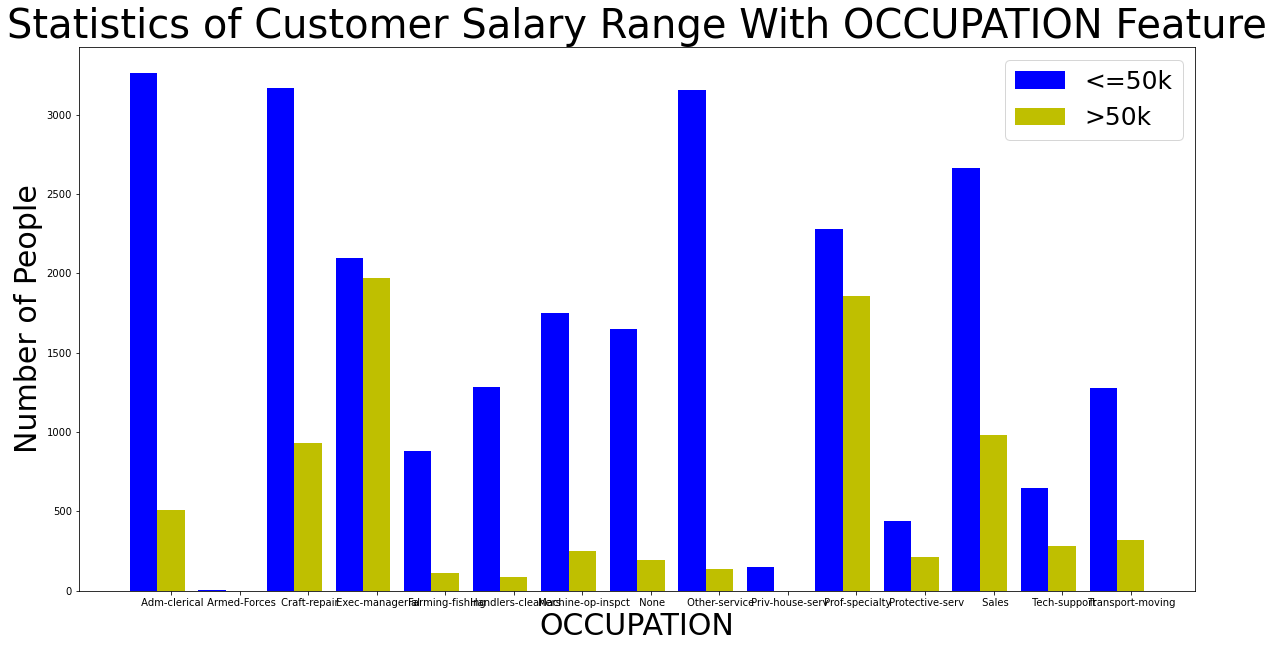

In [57]:
stats(data, salary_data, "occupation","bar",False)

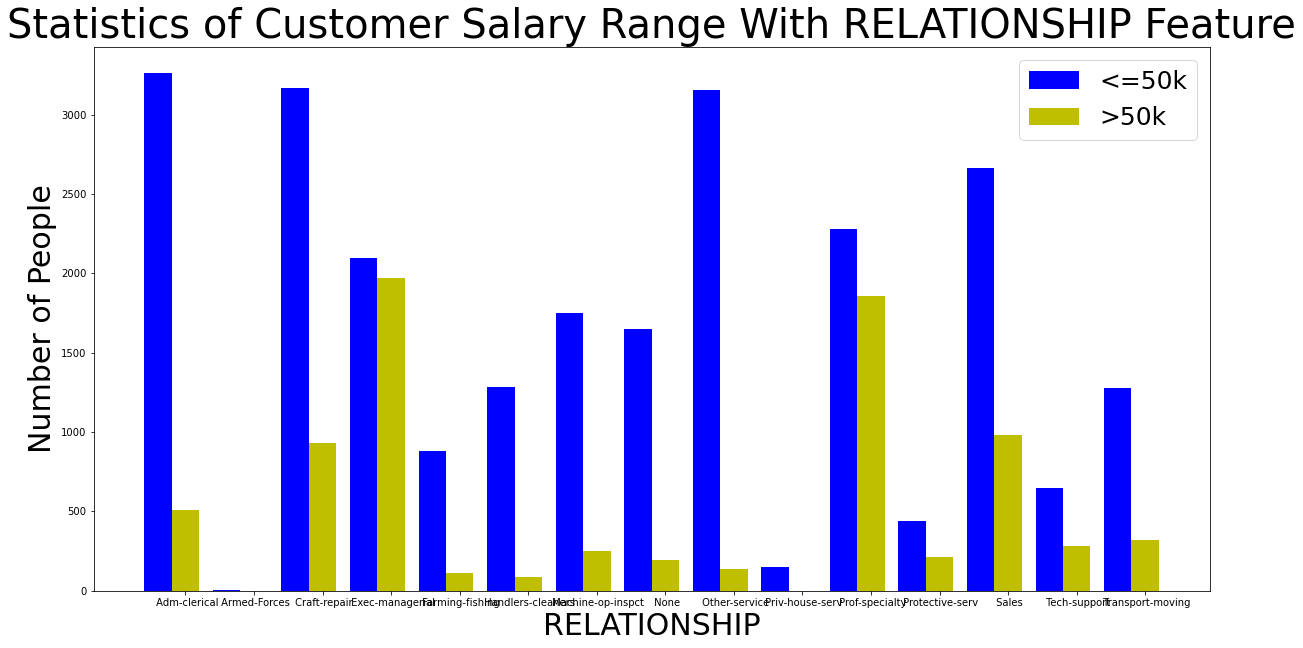

In [38]:
stats(data, salary_data, "relationship","bar",False)

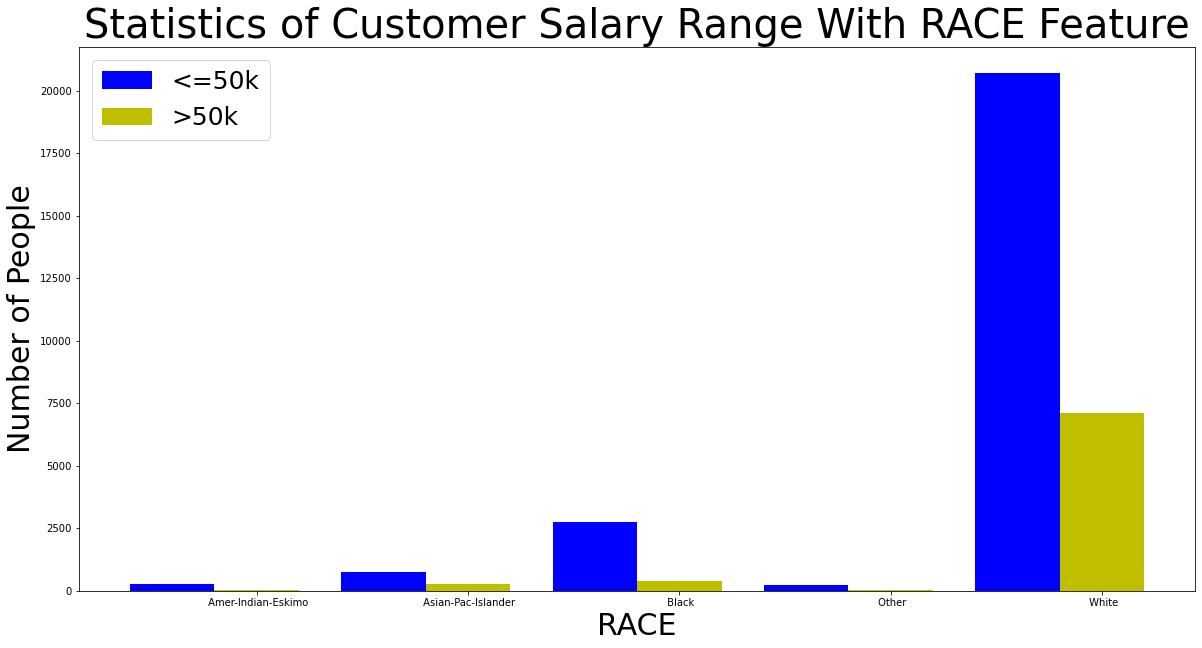

In [58]:
stats(data, salary_data, "race","bar",False)

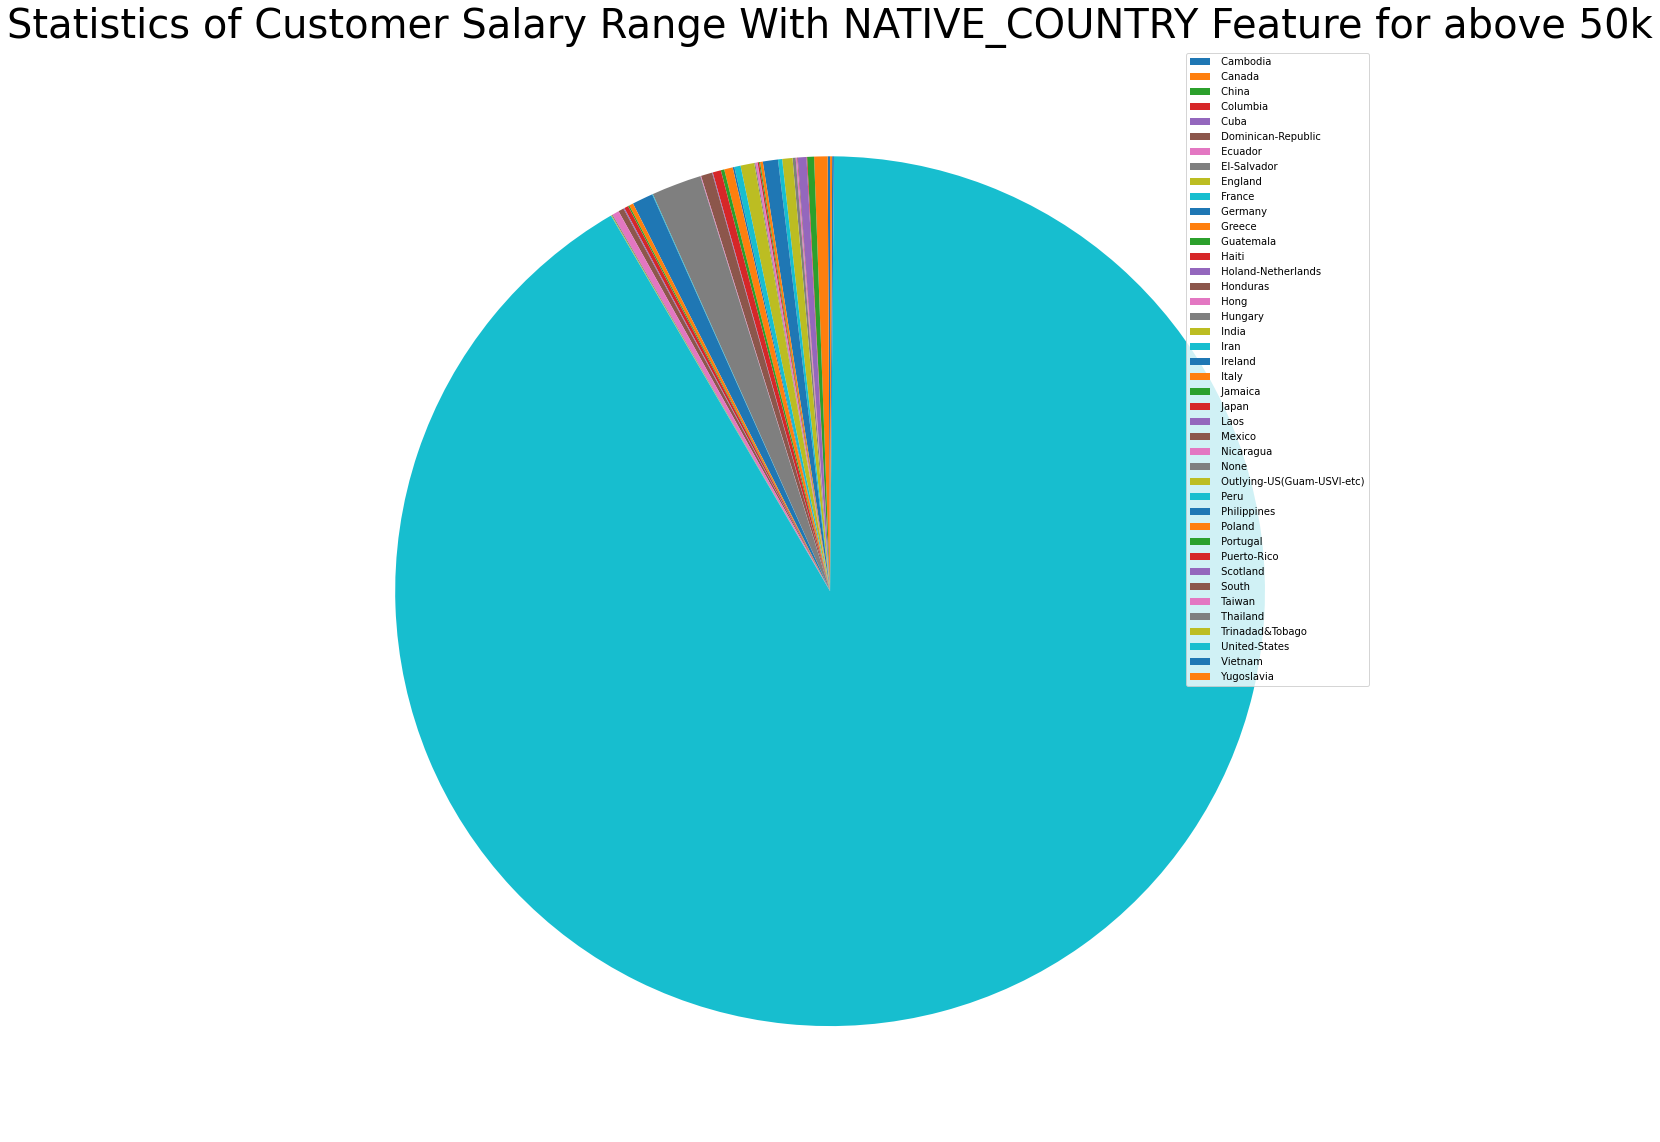

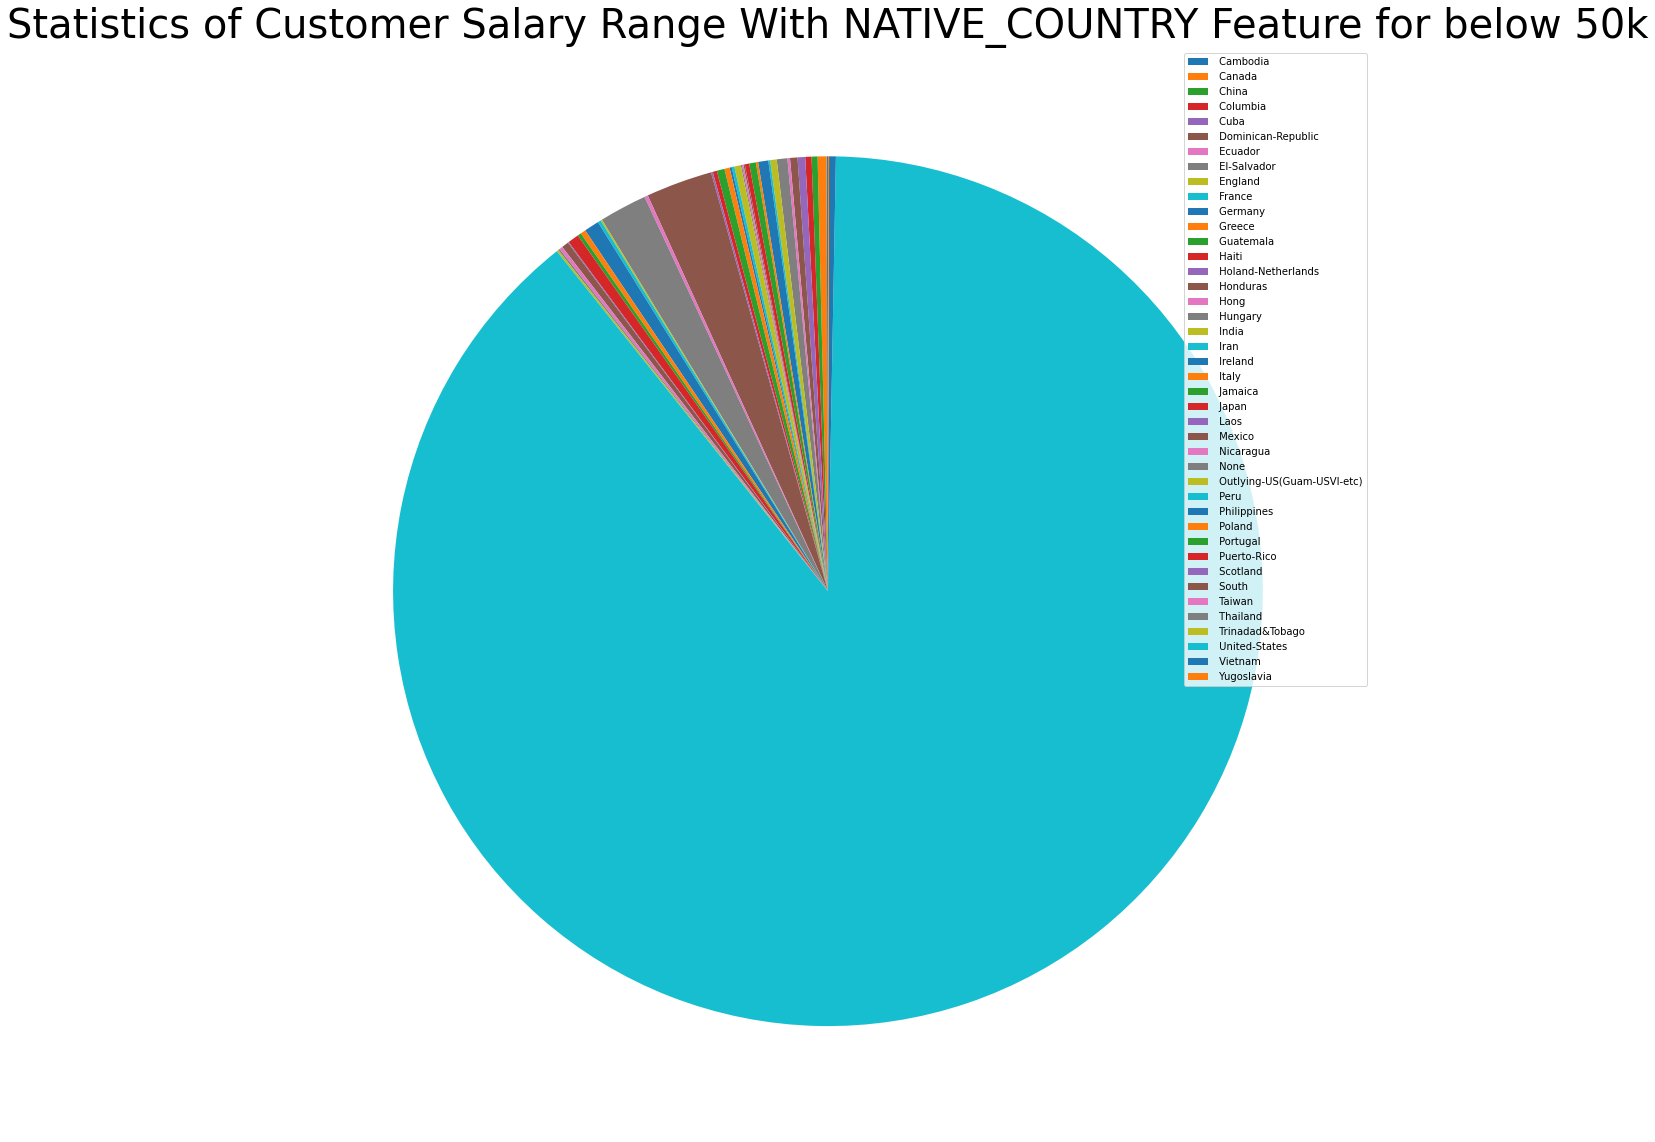

In [42]:
stats(data, salary_data, "native_country","pie",False)

In [61]:
def distribution(data, transformed=False):
    fig = plt.figure(figsize=(11, 5));

    for i, feature in enumerate(['capital_gain', 'capital_loss']):
        ax = fig.add_subplot(1, 2, i + 1)
        ax.hist(data[feature], bins=25, color='#00A0A0')
        ax.set_title("%s Feature Distribution" % (feature.upper()), fontsize=14)
        ax.set_xlabel("Value")
        ax.set_ylabel("Number of Records")
        ax.set_ylim((0, 2000))
        ax.set_yticks([0, 500, 1000, 1500, 2000])
        ax.set_yticklabels([0, 500, 1000, 1500, ">2000"])

    if transformed:
        fig.suptitle("Log-transformed Distributions of Continuous Census Data Features", \
                     fontsize=16, y=1.03)
    else:
        fig.suptitle("Skewed Distributions of Continuous Census Data Features", \
                     fontsize=16, y=1.03)

    fig.tight_layout()
    fig.show()


def evaluate(results, accuracy, f1):
    """
    Visualization code to display results of various learners.

    inputs:
      - learners: a list of supervised learners
      - stats: a list of dictionaries of the statistic results from 'train_predict()'
      - accuracy: The score for the naive predictor
      - f1: The score for the naive predictor
    """

    # Create figure
    fig, ax = plt.subplots(2, 3, figsize=(11, 7))

    # Constants
    bar_width = 0.3
    colors = ['#A00000', '#00A0A0', '#00A000', '#00000A']

    # Super loop to plot four panels of data
    for k, learner in enumerate(results.keys()):
        for j, metric in enumerate(['train_time', 'acc_train', 'f_train', 'pred_time', 'acc_test', 'f_test']):
            for i in np.arange(4):
                # Creative plot code
                ax[j / 4, j % 4].bar(i + k * bar_width, results[learner][i][metric], width=bar_width, color=colors[k])
                ax[j / 4, j % 4].set_xticks([0.45, 1.45, 2.45])
                ax[j / 4, j % 4].set_xticklabels(["1%", "10%", "100%"])
                ax[j / 4, j % 4].set_xlabel("Training Set Size")
                ax[j / 4, j % 4].set_xlim((-0.1, 3.0))

    # Add unique y-labels
    ax[0, 0].set_ylabel("Time (in seconds)")
    ax[0, 1].set_ylabel("Accuracy Score")
    ax[0, 2].set_ylabel("F-score")
    ax[1, 0].set_ylabel("Time (in seconds)")
    ax[1, 1].set_ylabel("Accuracy Score")
    ax[1, 2].set_ylabel("F-score")

    # Add titles
    ax[0, 0].set_title("Model Training")
    ax[0, 1].set_title("Accuracy Score on Training Subset")
    ax[0, 2].set_title("F-score on Training Subset")
    ax[1, 0].set_title("Model Predicting")
    ax[1, 1].set_title("Accuracy Score on Testing Set")
    ax[1, 2].set_title("F-score on Testing Set")

    # Add horizontal lines for naive predictors
    ax[0, 1].axhline(y=accuracy, xmin=-0.1, xmax=3.0, linewidth=1, color='k', linestyle='dashed')
    ax[1, 1].axhline(y=accuracy, xmin=-0.1, xmax=3.0, linewidth=1, color='k', linestyle='dashed')
    ax[0, 2].axhline(y=f1, xmin=-0.1, xmax=3.0, linewidth=1, color='k', linestyle='dashed')
    ax[1, 2].axhline(y=f1, xmin=-0.1, xmax=3.0, linewidth=1, color='k', linestyle='dashed')

    # Set y-limits for score panels
    ax[0, 1].set_ylim((0, 1))
    ax[0, 2].set_ylim((0, 1))
    ax[1, 1].set_ylim((0, 1))
    ax[1, 2].set_ylim((0, 1))

    # Create patches for the legend
    patches = []
    for i, learner in enumerate(results.keys()):
        patches.append(mpatches.Patch(color=colors[i], label=learner))
    plt.legend(handles=patches, bbox_to_anchor=(-.80, 2.53), \
               loc='upper center', borderaxespad=0., ncol=3, fontsize='x-large')

    # Aesthetics
    plt.suptitle("Performance Metrics for Three Supervised Learning Models", fontsize=16, y=1.10)
    plt.tight_layout()
    plt.show()

<ipython-input-61-26f59041c25b>:22: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


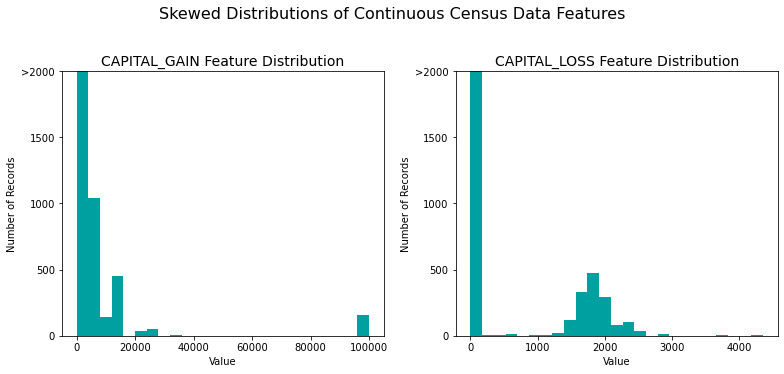

In [62]:
distribution(data)